In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('gima-indians-diabetes.csv')

In [3]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum() # there was no missing figure or number

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Observe the corrolation of the dataset
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170E3C5E7C8>,
      dtype=object)

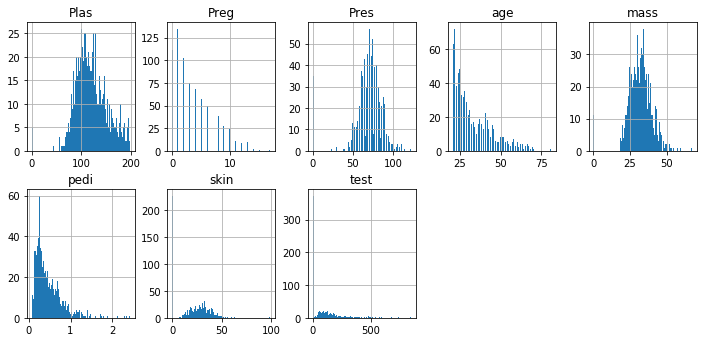

In [9]:
columns = list(df)[0:-1] # Excluding Outcome column which has only 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,5))
# Histogram of the dataset

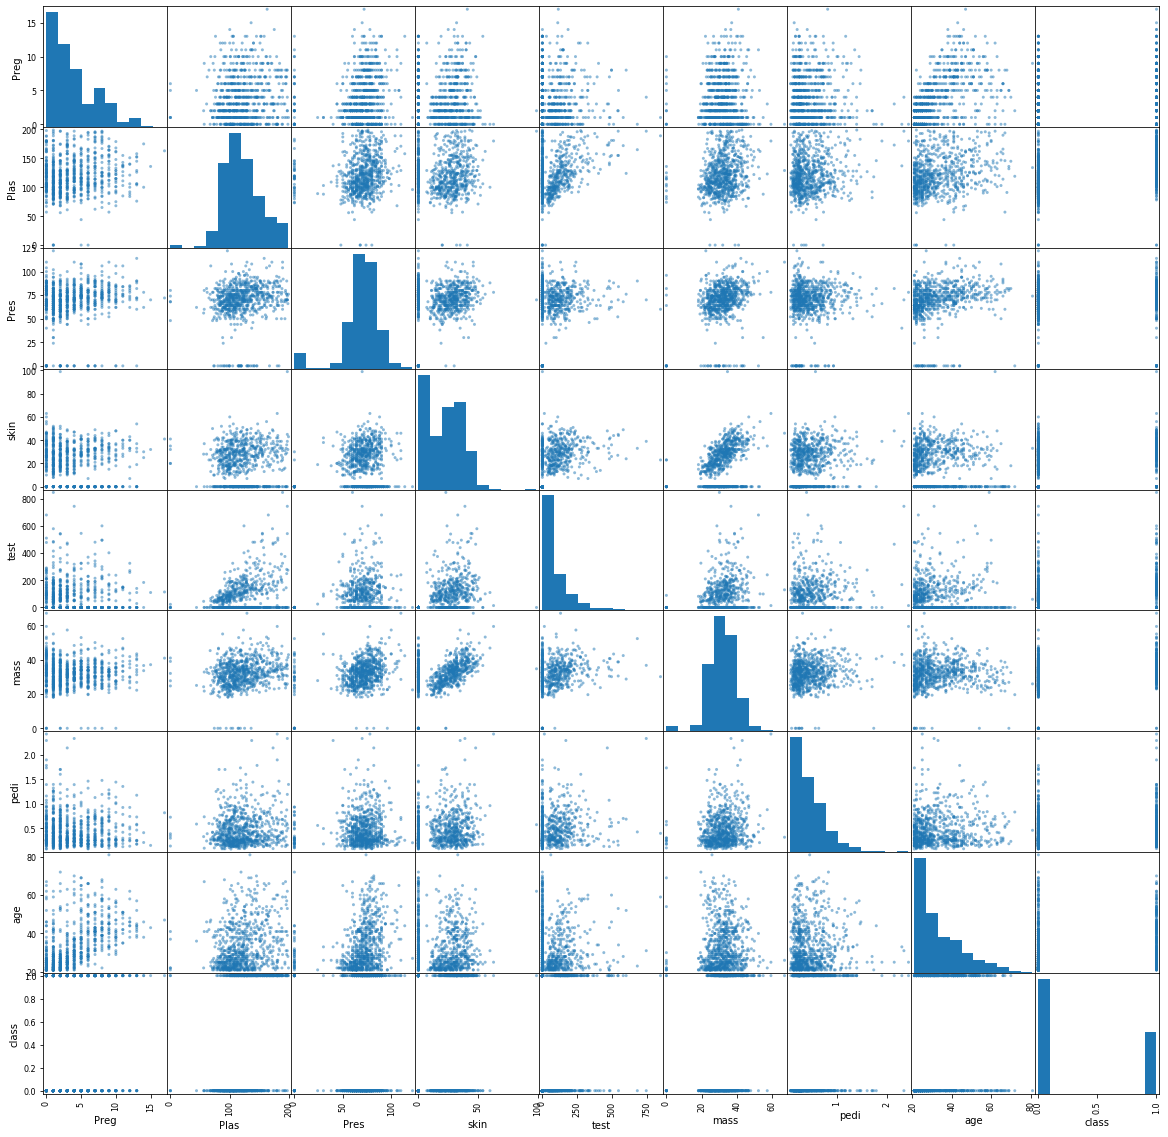

In [11]:
from pandas.plotting import scatter_matrix # The visual corrolation of the dataset
sz = scatter_matrix(df, figsize=(20,20))

In [15]:
cols = df.columns
print(cols)

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')


In [16]:
y =df['class']
drop_cols = ['class']
X = df.drop(drop_cols, axis=1)
X .head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


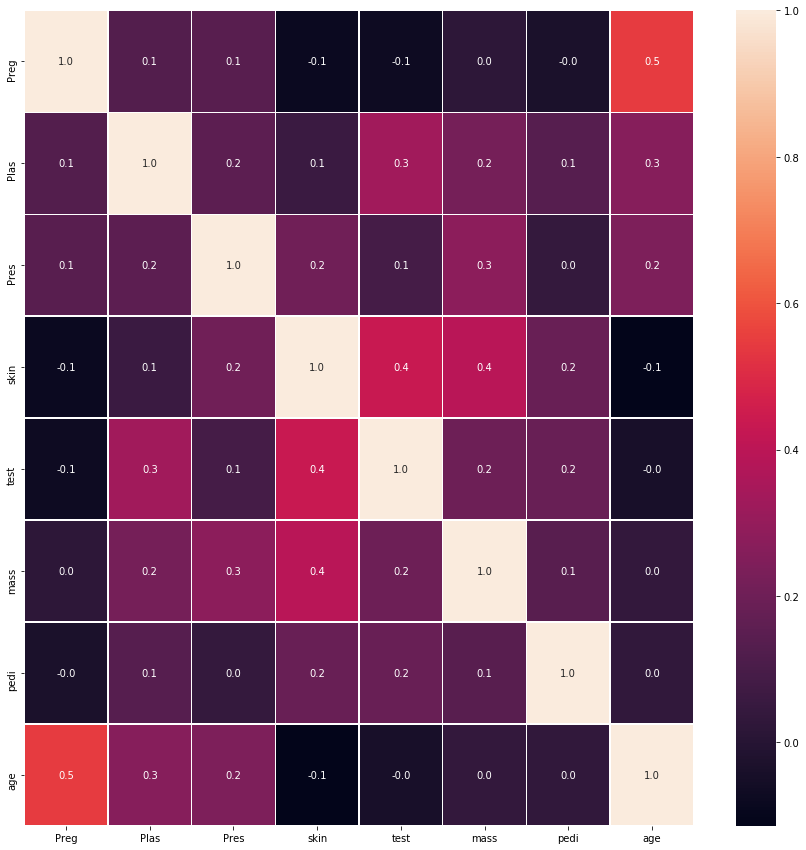

In [17]:
f, ax = plt.subplots(figsize=(15,15))
sb.heatmap(X.corr(), annot=True, linewidth=0.5, fmt='0.1f', ax=ax)

In [18]:
X.shape

(768, 8)

In [19]:
y.shape

(768,)

Number of true cases: 500 (65.10%)
Number of false cases: 268 (34.90%)


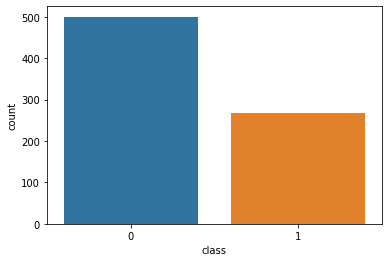

In [20]:
n_true = len(df.loc[df['class'] == True])
n_false = len(df.loc[df['class'] == False])

ax = sb.countplot(y, label ="count")
n_true,n_false = y.value_counts()

print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

In [21]:
X.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
                  # 1 is just any random seed number
y =df['class']
drop_cols = ['class']
X = df.drop(drop_cols, axis=1)
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [25]:
x_test.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


In [29]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 1]), (len(df.loc[df['class'] == 1])/len(df.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['class'] == 0]), (len(df.loc[df['class'] == 0])/len(df.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 213 (34.69%)
Training Diabetes False Values   : 401 (65.31%)

Test Diabetes True Values        : 55 (35.71%)
Test Diabetes False Values       : 99 (64.29%)



In [31]:
x_train.head() # from our features column there were no missing number but a lot of zeros(0)

,Preg,Plas,Pres,skin,test,mass,pedi,age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29


In [34]:
# Let replace 0 with serial mean
from sklearn.impute import SimpleImputer
geo = SimpleImputer(missing_values=0, strategy="mean")

g_x_train = pd.DataFrame(geo.fit_transform(x_train))
g_x_test = pd.DataFrame(geo.fit_transform(x_test))

g_x_train = x_train
g_x_test = x_test

x_train.head()

,0,1,2,3,4,5,6,7
0,9.0,145.0,80.0,46.000000,130.000000,37.9,0.637,40.0
1,10.0,129.0,62.0,36.000000,157.558442,41.2,0.441,38.0
2,7.0,102.0,74.0,40.000000,105.000000,37.2,0.204,45.0
3,8.0,120.0,78.0,28.770686,157.558442,25.0,0.409,64.0
4,2.0,120.0,76.0,37.000000,105.000000,39.7,0.215,29.0


In [36]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# fit the model on the train
logr = LogisticRegression(solver ='liblinear', fit_intercept=True)
logr.fit(x_train, y_train)
#predict on test
y_pred = logr.predict(x_test)

print(logr.coef_)
print(logr.intercept_)

[[ 1.43107485e-01  2.91496654e-02 -2.99680836e-02 -5.94419801e-03
  -1.97446110e-04  6.47382870e-02  4.30485086e-01  9.06956070e-03]]
[-5.15361593]


In [37]:
print(metrics.accuracy_score(y_test, y_pred))

0.7662337662337663


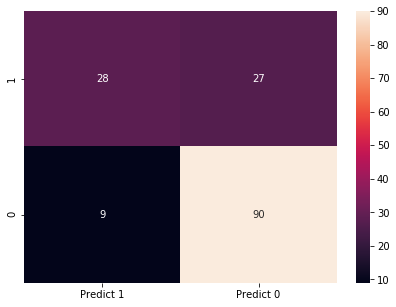

In [39]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sb.heatmap(df_cm, annot=True)